# Breast Cancer Screening by Mammography
Mammography is the most effective method for breast cancer screening
available today. However, the low positive predictive value of breast
biopsy resulting from mammogram interpretation leads to approximately
70% unnecessary biopsies with benign outcomes. To reduce the high
number of unnecessary breast biopsies, several computer-aided diagnosis
(CAD) systems have been proposed in the last years.These systems
help physicians in their decision to perform a breast biopsy on a suspicious
lesion seen in a mammogram or to perform a short term follow-up
examination instead.
This data set can be used to predict the severity (benign or malignant)
of a mammographic mass lesion from BI-RADS attributes and the patient's age.
It contains a BI-RADS assessment, the patient's age and three BI-RADS attributes
together with the ground truth (the severity field) for 516 benign and
445 malignant masses that have been identified on full field digital mammograms
collected at the Institute of Radiology of the
University Erlangen-Nuremberg between 2003 and 2006.
Each instance has an associated BI-RADS assessment ranging from 1 (definitely benign)
to 5 (highly suggestive of malignancy) assigned in a double-review process by
physicians. Assuming that all cases with BI-RADS assessments greater or equal
a given value (varying from 1 to 5), are malignant and the other cases benign,
sensitivities and associated specificities can be calculated. These can be an
indication of how well a CAD system performs compared to the radiologists.

Class Distribution: benign: 516; malignant: 445



# Attribute Information:

6 Attributes in total (1 goal field, 1 non-predictive, 4 predictive attributes)

1. BI-RADS assessment: 1 to 5 (ordinal, non-predictive!)
2. Age: patient's age in years (integer)
3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
6. Severity: benign=0 or malignant=1 (binominal, goal field!)

Missing Attribute Values:
- BI-RADS assessment: 2
- Age: 5
- Shape: 31
- Margin: 48
- Density: 76
- Severity: 0

Reference: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass

# We will build a model to predict whether or not the lump found in the mammography report is malignant using the dataset provided

In [1]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

Read the data from the mammographic_masses.data in a dataframe and explore the data

In [2]:
df = pd.read_csv('mammographic_masses.data')
df.head(5)

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


Notice '?' values in DF for some columns. These indicate missing values. Assign them to NA and read DF again

In [3]:
df = pd.read_csv('mammographic_masses.data', na_values='?', names=['BI-RADS','age', 'Shape', 'Margin', 'Density', 'Severity'])
df.head(5)

,BI-RADS,age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [4]:
df.describe()

,BI-RADS,age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


As we can see there are quite a few missing data values. We are going to drop the rows with missing values.

In [5]:
df.dropna(inplace=True)

In [6]:
df.describe()

,BI-RADS,age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


Now we have the same count for all columns. Lets extract them into Numpy arrays. We will read the first 5 columns in X and last column in y array.

In [7]:
X = df.drop('Severity', axis=1).values

In [8]:
y = df['Severity'].values

Now Let us split our dataset into Train and Test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now that we have the train and test split of our data, let us normalize our data using MinMax Scalar

In [10]:
scalar = MinMaxScaler()

In [11]:
X_train_normalize = scalar.fit_transform(X_train)

In [12]:
X_test_normalize = scalar.transform(X_test)

Now that our data has been normalized, we will build our model. We will build a model with 6 layers

In [13]:
model = Sequential()

model.add(Dense(units=5,input_dim=5, activation='relu'))

model.add(BatchNormalization())
model.add(Dense(units=12, activation='relu'))

model.add(BatchNormalization())
model.add(Dense(units=12, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(BatchNormalization())
model.add(Dense(units=5, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
batch_normalization (BatchNo (None, 5)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 12)                72        
_________________________________________________________________
batch_normalization_1 (Batch (None, 12)                48        
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 12)                4

Now Lets Train our Model

In [15]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test) )

Epoch 1/600
21/21 [==============================] - 2s 48ms/step - loss: 0.7141 - accuracy: 0.4905 - val_loss: 0.6933 - val_accuracy: 0.5361
Epoch 2/600
21/21 [==============================] - 0s 4ms/step - loss: 0.6637 - accuracy: 0.6112 - val_loss: 0.6930 - val_accuracy: 0.4699
Epoch 3/600
21/21 [==============================] - 0s 4ms/step - loss: 0.6475 - accuracy: 0.6265 - val_loss: 0.6910 - val_accuracy: 0.4699
Epoch 4/600
21/21 [==============================] - 0s 4ms/step - loss: 0.6362 - accuracy: 0.5942 - val_loss: 0.6891 - val_accuracy: 0.4940
Epoch 5/600
21/21 [==============================] - 0s 3ms/step - loss: 0.5919 - accuracy: 0.6627 - val_loss: 0.6791 - val_accuracy: 0.5120
Epoch 6/600
21/21 [==============================] - 0s 4ms/step - loss: 0.5758 - accuracy: 0.7182 - val_loss: 0.6666 - val_accuracy: 0.5301
Epoch 7/600
21/21 [==============================] - 0s 4ms/step - loss: 0.5965 - accuracy: 0.6740 - val_loss: 0.6530 - val_accuracy: 0.5361
Epoch 8/600


Epoch 59/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4654 - accuracy: 0.7900 - val_loss: 0.4148 - val_accuracy: 0.8133
Epoch 60/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4576 - accuracy: 0.7911 - val_loss: 0.4142 - val_accuracy: 0.8313
Epoch 61/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4366 - accuracy: 0.8095 - val_loss: 0.4123 - val_accuracy: 0.8253
Epoch 62/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4262 - accuracy: 0.8302 - val_loss: 0.4316 - val_accuracy: 0.8313
Epoch 63/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4481 - accuracy: 0.8038 - val_loss: 0.4322 - val_accuracy: 0.8253
Epoch 64/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4506 - accuracy: 0.8225 - val_loss: 0.4297 - val_accuracy: 0.8434
Epoch 65/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4408 - accuracy: 0.7942 - val_loss: 0.4272 - val_accuracy: 0.8313
Epoch 

21/21 [==============================] - 0s 3ms/step - loss: 0.4358 - accuracy: 0.8269 - val_loss: 0.4184 - val_accuracy: 0.8434
Epoch 117/600
21/21 [==============================] - 0s 4ms/step - loss: 0.4561 - accuracy: 0.8091 - val_loss: 0.4334 - val_accuracy: 0.8313
Epoch 118/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4232 - accuracy: 0.8132 - val_loss: 0.4299 - val_accuracy: 0.8494
Epoch 119/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4426 - accuracy: 0.7941 - val_loss: 0.4279 - val_accuracy: 0.8494
Epoch 120/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4103 - accuracy: 0.8341 - val_loss: 0.4275 - val_accuracy: 0.8494
Epoch 121/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4494 - accuracy: 0.8073 - val_loss: 0.4347 - val_accuracy: 0.8614
Epoch 122/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4147 - accuracy: 0.8110 - val_loss: 0.4341 - val_accuracy: 0.8313
Epoch 123/600

21/21 [==============================] - 0s 4ms/step - loss: 0.3963 - accuracy: 0.8386 - val_loss: 0.4411 - val_accuracy: 0.8434
Epoch 174/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4637 - accuracy: 0.8045 - val_loss: 0.4485 - val_accuracy: 0.8434
Epoch 175/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4000 - accuracy: 0.8288 - val_loss: 0.4378 - val_accuracy: 0.8253
Epoch 176/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4137 - accuracy: 0.8406 - val_loss: 0.4429 - val_accuracy: 0.8494
Epoch 177/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4245 - accuracy: 0.8102 - val_loss: 0.4396 - val_accuracy: 0.8253
Epoch 178/600
21/21 [==============================] - 0s 4ms/step - loss: 0.4173 - accuracy: 0.8330 - val_loss: 0.4401 - val_accuracy: 0.8373
Epoch 179/600
21/21 [==============================] - 0s 4ms/step - loss: 0.4318 - accuracy: 0.8182 - val_loss: 0.4317 - val_accuracy: 0.8313
Epoch 180/600

21/21 [==============================] - 0s 3ms/step - loss: 0.3793 - accuracy: 0.8333 - val_loss: 0.4323 - val_accuracy: 0.8554
Epoch 231/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3992 - accuracy: 0.8216 - val_loss: 0.4381 - val_accuracy: 0.8494
Epoch 232/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4123 - accuracy: 0.8179 - val_loss: 0.4433 - val_accuracy: 0.8253
Epoch 233/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3621 - accuracy: 0.8392 - val_loss: 0.4395 - val_accuracy: 0.8434
Epoch 234/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4101 - accuracy: 0.8127 - val_loss: 0.4346 - val_accuracy: 0.8494
Epoch 235/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3857 - accuracy: 0.8442 - val_loss: 0.4279 - val_accuracy: 0.8434
Epoch 236/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3779 - accuracy: 0.8550 - val_loss: 0.4272 - val_accuracy: 0.8373
Epoch 237/600

21/21 [==============================] - 0s 4ms/step - loss: 0.4023 - accuracy: 0.8300 - val_loss: 0.4384 - val_accuracy: 0.8193
Epoch 288/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3710 - accuracy: 0.8513 - val_loss: 0.4429 - val_accuracy: 0.8133
Epoch 289/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4018 - accuracy: 0.8441 - val_loss: 0.4383 - val_accuracy: 0.8434
Epoch 290/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3719 - accuracy: 0.8460 - val_loss: 0.4322 - val_accuracy: 0.8253
Epoch 291/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3880 - accuracy: 0.8474 - val_loss: 0.4273 - val_accuracy: 0.8193
Epoch 292/600
21/21 [==============================] - 0s 4ms/step - loss: 0.4013 - accuracy: 0.8357 - val_loss: 0.4332 - val_accuracy: 0.8373
Epoch 293/600
21/21 [==============================] - 0s 4ms/step - loss: 0.3783 - accuracy: 0.8307 - val_loss: 0.4379 - val_accuracy: 0.8313
Epoch 294/600

21/21 [==============================] - 0s 3ms/step - loss: 0.4412 - accuracy: 0.8288 - val_loss: 0.4340 - val_accuracy: 0.8434
Epoch 345/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3690 - accuracy: 0.8454 - val_loss: 0.4368 - val_accuracy: 0.8554
Epoch 346/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3807 - accuracy: 0.8348 - val_loss: 0.4384 - val_accuracy: 0.8554
Epoch 347/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3525 - accuracy: 0.8598 - val_loss: 0.4545 - val_accuracy: 0.7952
Epoch 348/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3714 - accuracy: 0.8359 - val_loss: 0.4516 - val_accuracy: 0.8193
Epoch 349/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3934 - accuracy: 0.8378 - val_loss: 0.4381 - val_accuracy: 0.8554
Epoch 350/600
21/21 [==============================] - 0s 4ms/step - loss: 0.3952 - accuracy: 0.8358 - val_loss: 0.4362 - val_accuracy: 0.8494
Epoch 351/600

21/21 [==============================] - 0s 3ms/step - loss: 0.3822 - accuracy: 0.8566 - val_loss: 0.4270 - val_accuracy: 0.8373
Epoch 402/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3917 - accuracy: 0.8319 - val_loss: 0.4410 - val_accuracy: 0.8373
Epoch 403/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8256 - val_loss: 0.4424 - val_accuracy: 0.8434
Epoch 404/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3633 - accuracy: 0.8589 - val_loss: 0.4422 - val_accuracy: 0.8373
Epoch 405/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3943 - accuracy: 0.8345 - val_loss: 0.4341 - val_accuracy: 0.8313
Epoch 406/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3715 - accuracy: 0.8474 - val_loss: 0.4220 - val_accuracy: 0.8313
Epoch 407/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4027 - accuracy: 0.8290 - val_loss: 0.4251 - val_accuracy: 0.8434
Epoch 408/600

21/21 [==============================] - 0s 3ms/step - loss: 0.4111 - accuracy: 0.8156 - val_loss: 0.4414 - val_accuracy: 0.8494
Epoch 459/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3788 - accuracy: 0.8399 - val_loss: 0.4378 - val_accuracy: 0.8494
Epoch 460/600
21/21 [==============================] - 0s 4ms/step - loss: 0.3689 - accuracy: 0.8370 - val_loss: 0.4345 - val_accuracy: 0.8494
Epoch 461/600
21/21 [==============================] - 0s 5ms/step - loss: 0.3920 - accuracy: 0.8385 - val_loss: 0.4298 - val_accuracy: 0.8434
Epoch 462/600
21/21 [==============================] - 0s 4ms/step - loss: 0.3946 - accuracy: 0.8523 - val_loss: 0.4296 - val_accuracy: 0.8434
Epoch 463/600
21/21 [==============================] - 0s 4ms/step - loss: 0.3892 - accuracy: 0.8431 - val_loss: 0.4357 - val_accuracy: 0.8434
Epoch 464/600
21/21 [==============================] - 0s 4ms/step - loss: 0.3560 - accuracy: 0.8537 - val_loss: 0.4372 - val_accuracy: 0.8614
Epoch 465/600

21/21 [==============================] - 0s 3ms/step - loss: 0.3423 - accuracy: 0.8628 - val_loss: 0.4271 - val_accuracy: 0.8193
Epoch 516/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3974 - accuracy: 0.8222 - val_loss: 0.4251 - val_accuracy: 0.8494
Epoch 517/600
21/21 [==============================] - 0s 4ms/step - loss: 0.3803 - accuracy: 0.8472 - val_loss: 0.4208 - val_accuracy: 0.8373
Epoch 518/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3814 - accuracy: 0.8393 - val_loss: 0.4225 - val_accuracy: 0.8373
Epoch 519/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3730 - accuracy: 0.8395 - val_loss: 0.4256 - val_accuracy: 0.8253
Epoch 520/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3925 - accuracy: 0.8584 - val_loss: 0.4259 - val_accuracy: 0.8313
Epoch 521/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4287 - accuracy: 0.8173 - val_loss: 0.4316 - val_accuracy: 0.8434
Epoch 522/600

21/21 [==============================] - 0s 3ms/step - loss: 0.3793 - accuracy: 0.8546 - val_loss: 0.4296 - val_accuracy: 0.8494
Epoch 573/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3854 - accuracy: 0.8382 - val_loss: 0.4338 - val_accuracy: 0.8494
Epoch 574/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3943 - accuracy: 0.8492 - val_loss: 0.4286 - val_accuracy: 0.8494
Epoch 575/600
21/21 [==============================] - 0s 4ms/step - loss: 0.3927 - accuracy: 0.8284 - val_loss: 0.4324 - val_accuracy: 0.8434
Epoch 576/600
21/21 [==============================] - 0s 4ms/step - loss: 0.3982 - accuracy: 0.8255 - val_loss: 0.4326 - val_accuracy: 0.8313
Epoch 577/600
21/21 [==============================] - 0s 5ms/step - loss: 0.3454 - accuracy: 0.8530 - val_loss: 0.4246 - val_accuracy: 0.8434
Epoch 578/600
21/21 [==============================] - 0s 3ms/step - loss: 0.3660 - accuracy: 0.8560 - val_loss: 0.4185 - val_accuracy: 0.8614
Epoch 579/600

<AxesSubplot:>

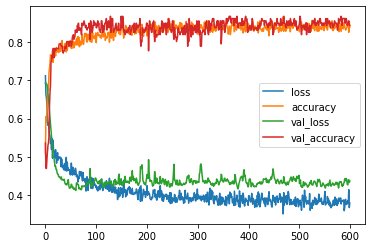

In [16]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [17]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.8434


[0.43713927268981934, 0.8433734774589539]

Our Current model is giving us 84% accuracy on our test set